<a href="https://colab.research.google.com/github/carbonpredict/carbonpredict/blob/master/notebooks/Carbon_EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/Compensate-Operations/emission-sample-data.git

Cloning into 'emission-sample-data'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 16 (delta 0), reused 2 (delta 0), pack-reused 13
Unpacking objects: 100% (16/16), done.


In [0]:
!for i in /content/emission-sample-data/datasets/textile-v1.0.0/*.tgz; do tar -zxvf "$i" ;done

!ls -lah
!rm ._textile-v1.0.0-5.csv

textile-v1.0.0-1.csv
textile-v1.0.0-2.csv
textile-v1.0.0-3.csv
textile-v1.0.0-4.csv
._textile-v1.0.0-5.csv
textile-v1.0.0-5.csv
total 1.0G
drwxr-xr-x 1 root root  4.0K Jun 10 07:07 .
drwxr-xr-x 1 root root  4.0K Jun 10 06:56 ..
drwxr-xr-x 1 root root  4.0K Jun  8 16:15 .config
drwxr-xr-x 4 root root  4.0K Jun 10 07:06 emission-sample-data
drwxr-xr-x 1 root root  4.0K May 29 18:19 sample_data
-rw-r--r-- 1  501 staff 205M Jun  8 18:21 textile-v1.0.0-1.csv
-rw-r--r-- 1  501 staff 205M Jun  8 18:27 textile-v1.0.0-2.csv
-rw-r--r-- 1  501 staff 205M Jun  8 18:32 textile-v1.0.0-3.csv
-rw-r--r-- 1  501 staff 205M Jun  8 18:38 textile-v1.0.0-4.csv
-rw-r--r-- 1  501 staff  233 Jun  8 18:44 ._textile-v1.0.0-5.csv
-rw-r--r-- 1  501 staff 205M Jun  8 18:44 textile-v1.0.0-5.csv


In [0]:
import pandas as pd
import os

content = sorted(filter(lambda x: x.endswith(".csv"), os.listdir("/content/")))

df = pd.concat((pd.read_csv(f) for f in content))
df

,brand,category-1,category-2,category-3,co2_total,colour,fabric_type,ftp_acrylic,ftp_cotton,ftp_elastane,ftp_linen,ftp_other,ftp_polyamide,ftp_polyester,ftp_polypropylene,ftp_silk,ftp_viscose,ftp_wool,gender,label,made_in,season,size,unspsc_code,weight
0,b111,womenswear,uniform,jacket,NaN,blue gray,K,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,NaN,TR,NaN,XS,NaN,1.062
1,b82,home,home,curtain,NaN,teal,W,NaN,11.0,5.0,NaN,3.0,NaN,7.0,4.0,NaN,NaN,68.0,NaN,NaN,PK,NaN,XXL,NaN,NaN
2,b107,menswear,headgear,knit-cap,NaN,metal,K,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,89.0,2.0,NaN,M,NaN,PK,NaN,XL,NaN,0.160
3,b111,home,home,curtain,NaN,light grey,K,NaN,NaN,23.0,38.0,22.0,NaN,NaN,8.0,1.0,5.0,NaN,NaN,NaN,TR,NaN,M,NaN,NaN
4,b83,womenswear,footwear,socks,NaN,bondi blue,K,21.0,NaN,NaN,NaN,NaN,43.0,NaN,24.0,NaN,NaN,11.0,W,NaN,VN,NaN,M,NaN,0.029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,b90,womenswear,nightwear,pyjama,NaN,pink,K,NaN,9.0,NaN,NaN,NaN,46.0,44.0,NaN,NaN,NaN,NaN,W,NaN,CN,NaN,L,NaN,NaN
2999996,b133,baby,footwear,socks,NaN,wheat,K,NaN,NaN,NaN,NaN,NaN,2.0,90.0,3.0,NaN,1.0,3.0,NaN,NaN,TW,NaN,XL,NaN,NaN
2999997,b1,menswear,outerwear,pants,NaN,gold,W,5.0,7.0,NaN,NaN,NaN,79.0,NaN,3.0,NaN,NaN,4.0,M,NaN,US,NaN,S,NaN,NaN
2999998,b73,menswear,accessory,backpack,NaN,amber,K,14.0,10.0,13.0,51.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,M,NaN,BD,NaN,XL,NaN,NaN


In [0]:

df[~df["co2_total"].isna()]


,brand,category-1,category-2,category-3,co2_total,colour,fabric_type,ftp_acrylic,ftp_cotton,ftp_elastane,ftp_linen,ftp_other,ftp_polyamide,ftp_polyester,ftp_polypropylene,ftp_silk,ftp_viscose,ftp_wool,gender,label,made_in,season,size,unspsc_code,weight
23,b101,womenswear,headgear,flat-cap,4.90,light brown,K,NaN,12.0,6.0,1.0,6.0,3.0,7.0,NaN,61.0,NaN,NaN,W,NaN,TR,NaN,S,NaN,0.122
34,b131,clothing,accessory,backpack,26.92,unbleached,K,NaN,9.0,6.0,NaN,NaN,8.0,6.0,NaN,NaN,NaN,69.0,W,NaN,CN,NaN,M,NaN,NaN
51,b76,baby,thermals,trousers,34.06,purple,K,NaN,NaN,10.0,NaN,NaN,1.0,6.0,3.0,69.0,NaN,6.0,NaN,NaN,US,AYR,M,NaN,NaN
56,b86,menswear,swimwear,swimsuit,3.92,natural,K,NaN,NaN,NaN,31.0,NaN,15.0,45.0,8.0,NaN,NaN,NaN,M,NaN,HK,NaN,XS,NaN,NaN
74,b131,kidswear,thermals,trousers,38.77,green,K,8.0,2.0,14.0,NaN,14.0,NaN,36.0,14.0,3.0,6.0,NaN,B,NaN,ES,MID,XXL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999961,b66,clothing,home,sheets,8.17,turquoise,W,2.0,NaN,NaN,91.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,G,NaN,CN,NaN,XS,NaN,NaN
2999970,b131,clothing,clothing,jeans,9.70,blue gray,K,NaN,NaN,10.0,8.0,5.0,10.0,NaN,NaN,6.0,NaN,59.0,Y,NaN,CN,NaN,L,NaN,NaN
2999980,b125,baby,footwear,socks,1.75,unbleached,K,NaN,NaN,20.0,NaN,NaN,16.0,5.0,8.0,NaN,9.0,39.0,NaN,NaN,PK,NaN,M,NaN,NaN
2999981,b103,kidswear,footwear,socks,1.16,mustard,K,2.0,NaN,NaN,NaN,4.0,1.0,79.0,1.0,5.0,NaN,4.0,B,NaN,TR,NaN,L,NaN,NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


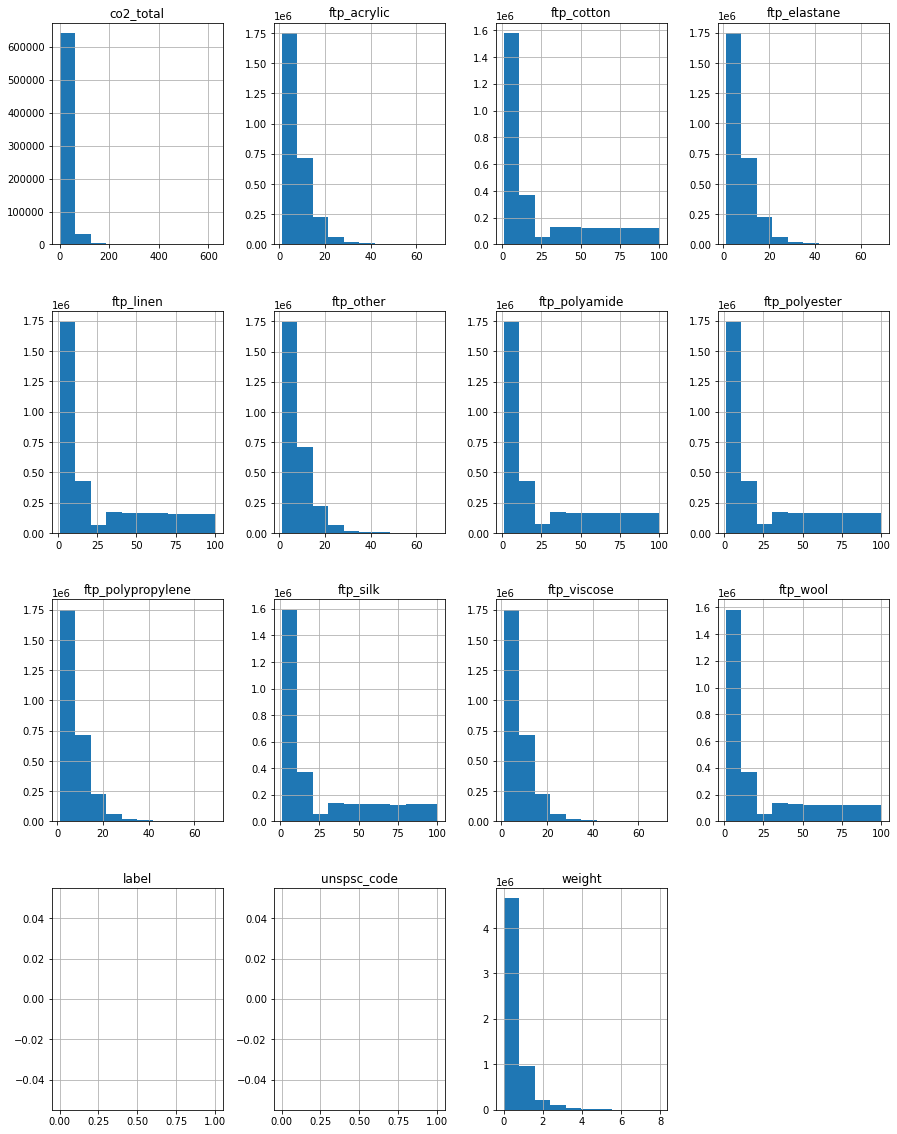

In [0]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

selected_cols = ["ftp_acrylic", 
                 "ftp_cotton", 
                 "ftp_elastane", 
                 "ftp_linen", 
                 "ftp_other", 
                 "ftp_polyamide",	
                 "ftp_polyester", 
                 "ftp_polypropylene", 
                 "ftp_silk", 
                 "ftp_viscose", 
                 "ftp_wool"]

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
weight_data = df[~df["weight"].isna()].hist(ax=ax)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


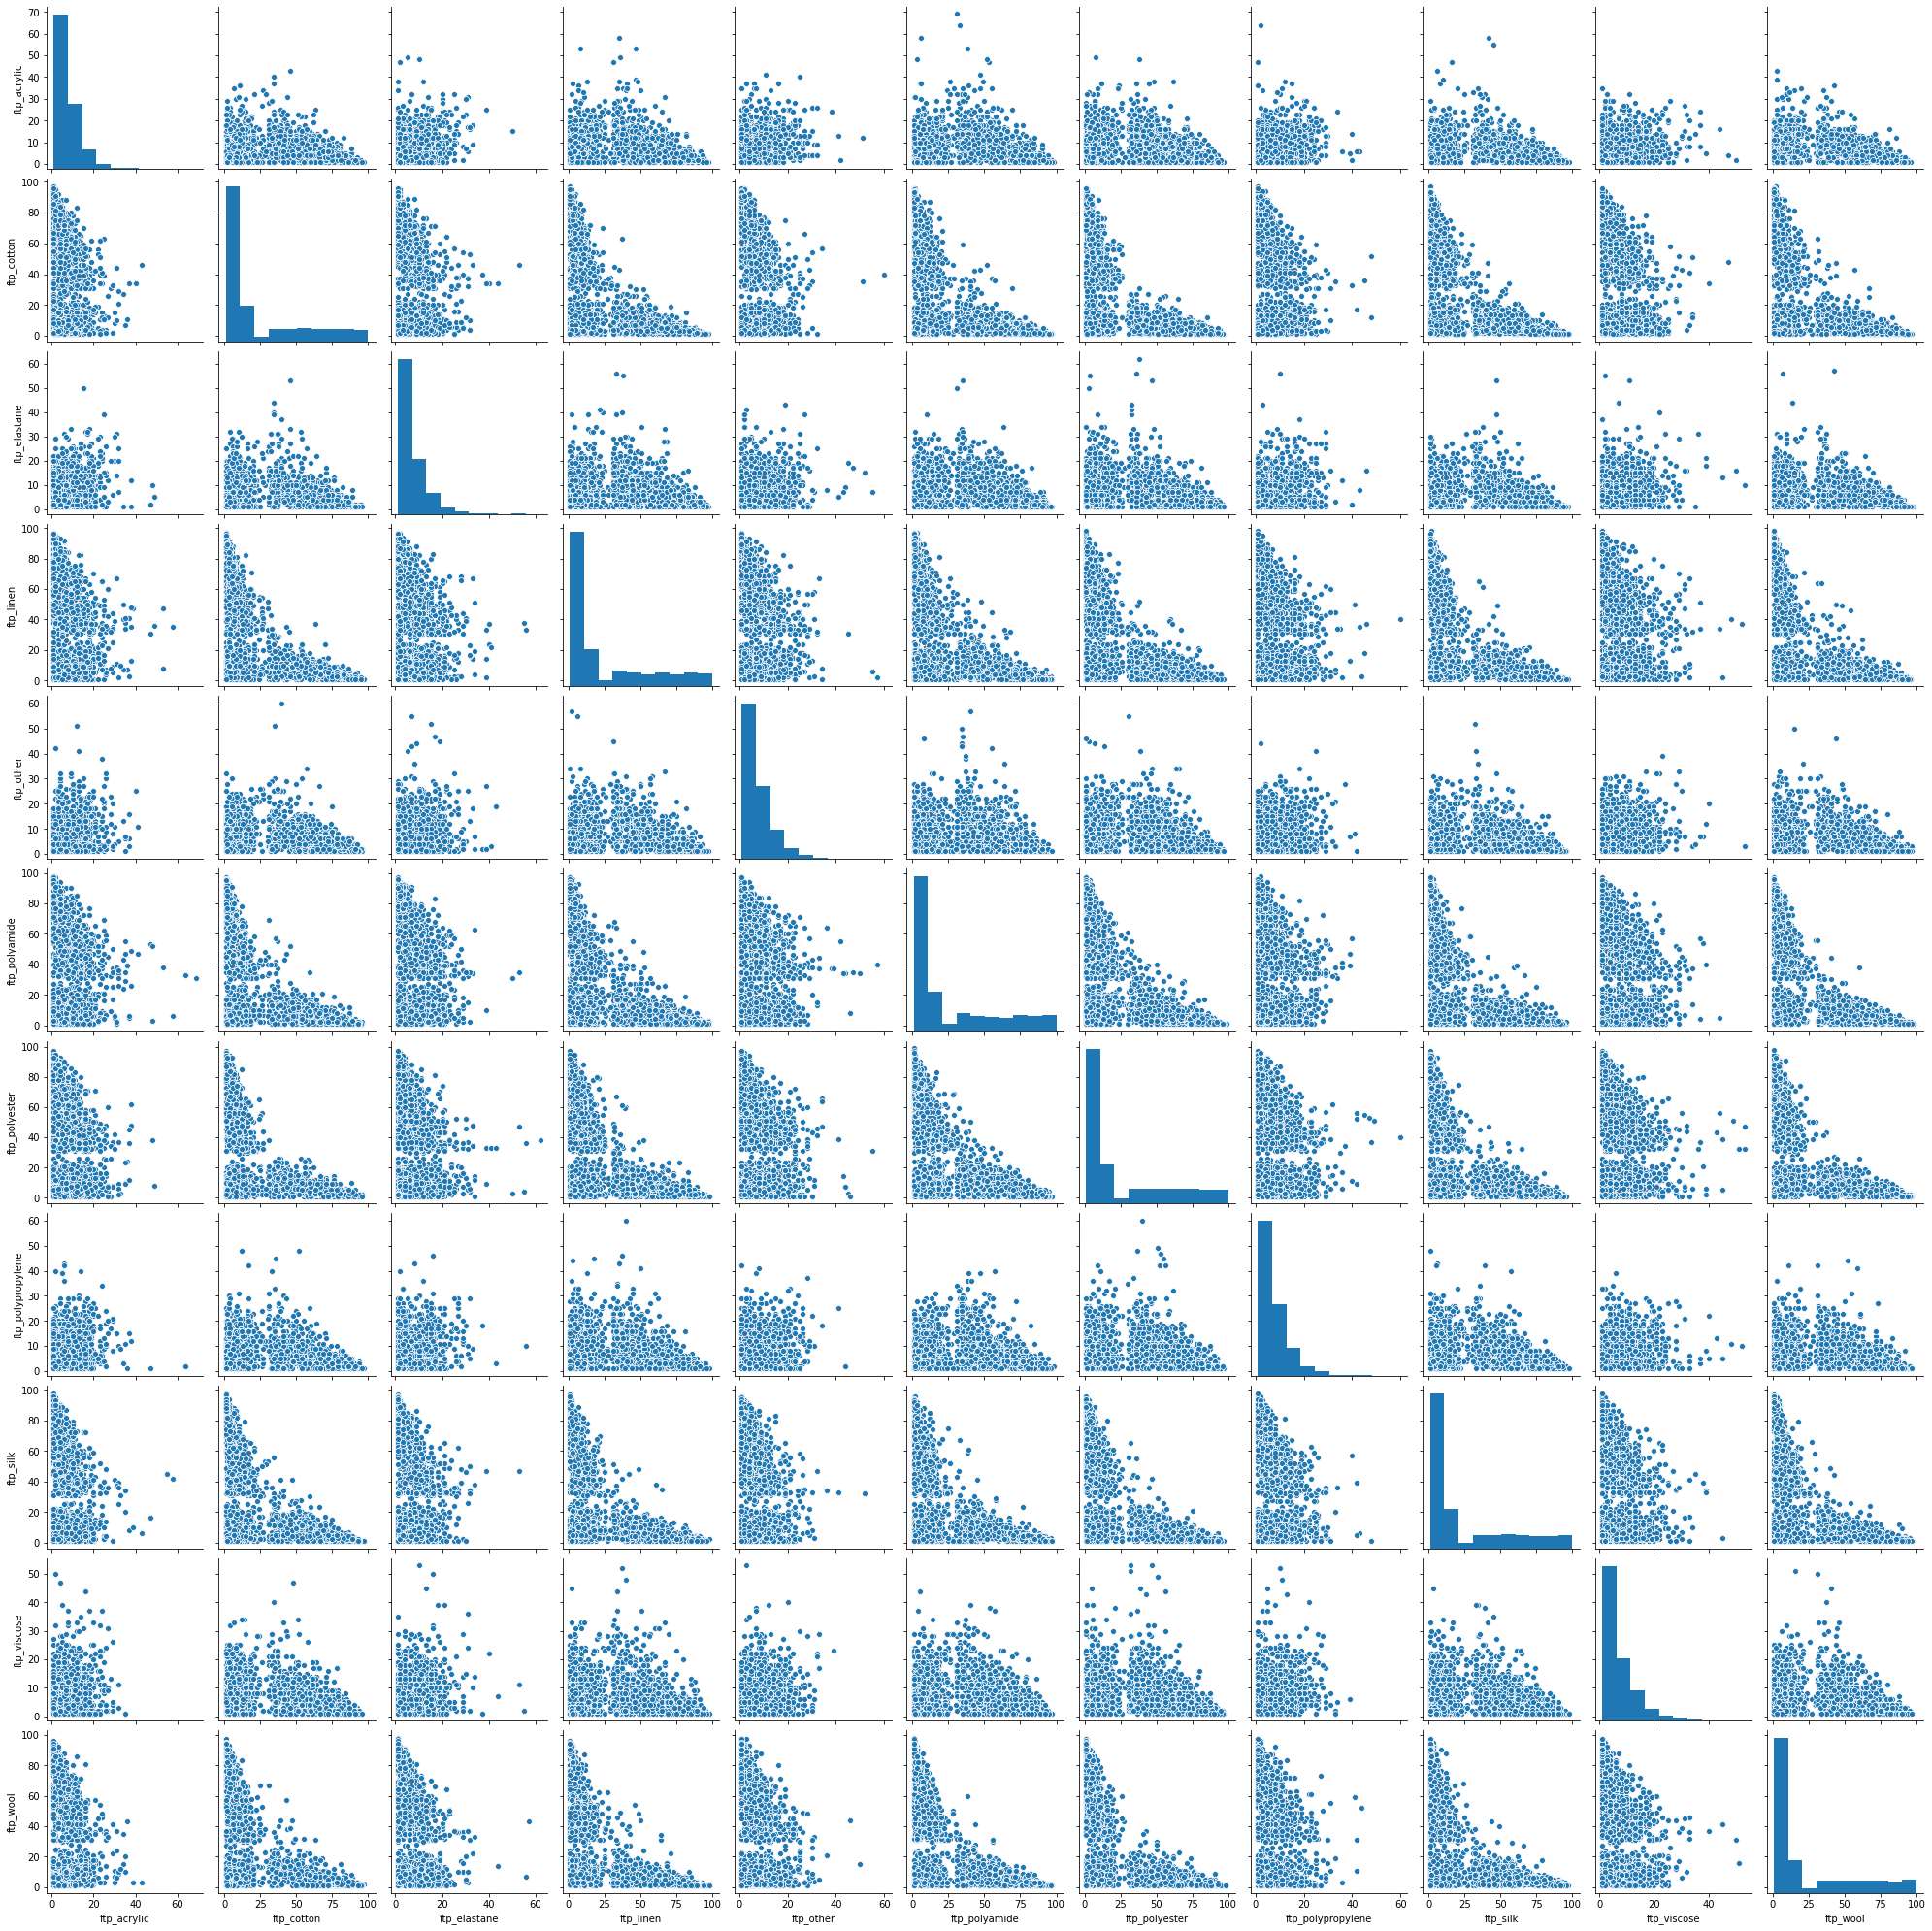

In [0]:


weight_data = df[~df["weight"].isna()].sample(10000)

sns.pairplot(weight_data[selected_cols])
plt.show()


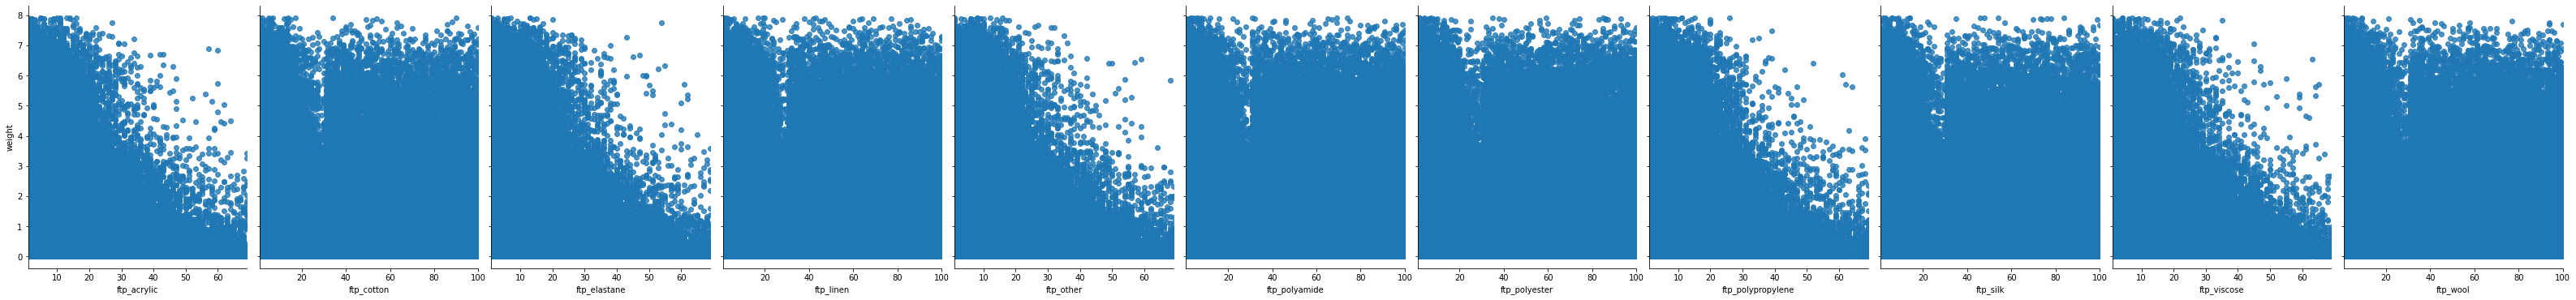

In [0]:
# HOX! Running this cell takes forever. Do not run :)
weight_data = df[~df["weight"].isna()]

sns.pairplot(weight_data, x_vars=selected_cols, y_vars=["weight"],
             height=5, aspect=.8, kind="reg")

